In [3]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import pi


In [74]:
def f(x):
    #return 3.5*x - (3*pow(x,2)/2)
    return 3.5*(x-1) - (3*pow(x-1,2)/2)
    #return (x*np.sin(10*x*np.pi)+1)  # function to be MAXIMIZED

No handles with labels found to put in legend.


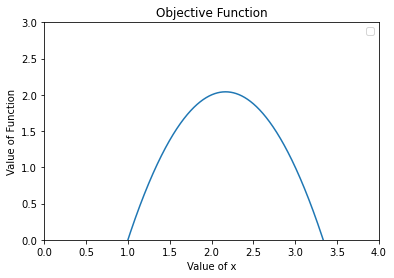

In [75]:
x = np.arange(0, 4, 0.0001)
y = f(x)
plt.plot(x,y)
plt.xlabel('Value of x')
plt.ylabel('Value of Function')
plt.title('Objective Function')
plt.xlim([0,4])
plt.ylim([0,3])
plt.legend()
plt.show()



In [76]:
def initialize_population(population_size):
    population = []
    for j in range(population_size):
        xs = np.random.randint(low=0, high=4, size =1)
        x = np.random.randint(low=0, high=9, size = 4)
        x = np.append(xs,x)
        population = np.append(population,x)
    population = np.split(population, population_size)
    return population
#initialize_population(100)

No handles with labels found to put in legend.


[0.2772, 1.5082, 1.0266, 1.7004, 1.4021, 2.2817, 3.665, 1.0058, 2.8286, 1.0448, 0.5702, 1.0366, 1.8251, 3.3538, 2.8111, 1.7457, 1.3231, 3.2372, 1.5436, 3.0254, 1.3672, 3.43, 2.4423, 1.7626, 2.248, 3.713, 1.6574, 1.8232, 1.3062, 2.0448, 3.5747, 1.41, 3.7205, 2.5813, 1.7623, 2.0724, 1.3885, 2.0017, 0.4228, 1.2383, 1.5527, 2.5258, 2.3276, 0.6131, 1.2734, 2.077, 1.1482, 1.2573, 2.4801, 2.1252, 3.7586, 2.6115, 2.2224, 0.5838, 3.1043, 1.4441, 0.0622, 0.0635, 3.4036, 0.1188, 2.4467, 2.8226, 0.4268, 3.3336, 2.8522, 3.1164, 3.3886, 3.702, 3.0403, 1.6712, 2.1148, 3.2263, 3.4428, 2.8081, 0.6583, 3.5823, 1.3373, 1.5554, 0.037, 2.3686, 0.5168, 0.5446, 1.2515, 2.25, 1.5857, 3.4343, 2.0534, 1.8057, 2.6815, 2.8768, 3.6826, 0.4388, 0.604, 2.0887, 0.1805, 3.8083, 3.2628, 2.0582, 0.078, 2.8111]


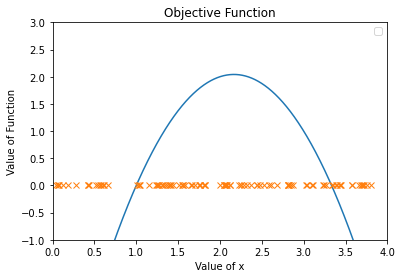

In [77]:
def display(population):
    pop = [''.join(str(int(p)) for p in po) for po in population ]
    pop = [float(p)/10000 for p in pop]
    popy = np.zeros(len(pop))
    print(pop)
    x = np.arange(0, 4, 0.0001)
    y1 = f(x)
    ax = plt.subplot(111)
    ax.plot(x,y1)
    ax.plot(pop,popy,'x')
    ax.set_xlabel('Value of x')
    ax.set_ylabel('Value of Function')
    ax.set_title('Objective Function')
    plt.xlim([0,4])
    plt.ylim([-1,3])
    ax.legend()
    plt.show() 
    
pop = initialize_population(100)
display(pop)

In [78]:
def double_point_crossover(parents, num_offspring):
    children = []
    for i in range(int(num_offspring/2)):
        index1 = np.random.randint(low=0, high=9)
        index2 = np.random.randint(low=0, high=9)
        parent1 = parents[index1]
        parent2 = parents[index2]
        offspring1 = np.append(parent1[0:2],parent2[2:4])
        offspring1 = np.append(offspring1 ,parent1[4:])
        offspring2 = np.append(parent2[0:2],parent1[2:4])
        offspring2 = np.append(offspring2, parent2[4:])
        children = np.append(children, offspring1)
        children = np.append(children, offspring2)
    children = np.split(children, num_offspring)
    return children


In [79]:
def mutation(children, prop):
    num_offspring = len(children)
    for i in range(num_offspring):
        for j in range(1,5):
            probability = np.random.uniform(low=0, high=1)
            if probability < prop:
                random_value = np.random.randint(low=0, high=9)
                children[i][j] = random_value
    return children


In [80]:
def evaluate_fitness(population):
    population_size = len(population)
    fitness = []
    bestx, fitx = -1, 0
    alpha = np.random.rand(1)[0]
    for j in range(population_size):
        ind = population[j]
    
        x = float(str((int(ind[0])))+"."+str((int(ind[1])))+str((int(ind[2])))+str((int(ind[3])))+str((int(ind[4]))))
        if float(x)<0 or float(x)>4: 
            
            fit = f(2)
        else:
            fit = f(x)
       
        fitness = np.append(fitness,fit)
        if bestx:
            if fit > fitx:
                fitx = fit
                bestx = x
        else:
            fitx = fit
            bestx = x
    return fitness, bestx

In [81]:
def selection(population, fitness, num_parents):
    parents =[]
    
    population = [[float(str((int(ind[0])))+"."+str((int(ind[1])))+str((int(ind[2])))+str((int(ind[3])))+str((int(ind[4])))),ind] for ind in population]
    #print(population)
    #population = population[population[:,0].argsort()]
    
    for i in range(int(num_parents)):
        if fitness[i] > fitness[-i]:
            parents = np.append(parents, population[i][1])
        else:
            parents = np.append(parents, population[-i][1])
    parents = np.split(parents, num_parents)
    return parents        

In [82]:
def genetic_algorithm(num_generations, population_size, prop=0.5):
    population = initialize_population(population_size)
    best, avg, worst, bestx = [], [], [], []
    
    for gen in range(num_generations):
        fitness, bx = evaluate_fitness(population)
       
        best.append(np.max(fitness))
        avg.append(np.mean(fitness))
        worst.append(np.min(fitness))
        
        bestx.append(bx) 
        
        parents = selection(population,fitness,num_parents =int(population_size/2))
        children = double_point_crossover(parents, num_offspring = int(population_size/2))
        children = mutation(children,prop=0.5)
        population  = np.append(parents,children)
        population = np.split(population, population_size)
    
    fitness, bx = evaluate_fitness(population)
    best.append(np.max(fitness))
    avg.append(np.mean(fitness))
    worst.append(np.min(fitness))
    bestx.append(bx)
    print(np.mean(fitness))
    best_solution_index = np.argmax(fitness)
    best_OF_value = max(fitness)
    
    ind = population[best_solution_index]
    best_solution = float(str((int(ind[0])))+"."+str((int(ind[1])))+str((int(ind[2])))+str((int(ind[3])))+str((int(ind[4]))))
    
    return best_OF_value, best_solution, best, avg, worst, bestx, population

1.9950808652999998
The largest value of the objective function is:  2.0416666649999997
The corresponding solution is x =  2.1667


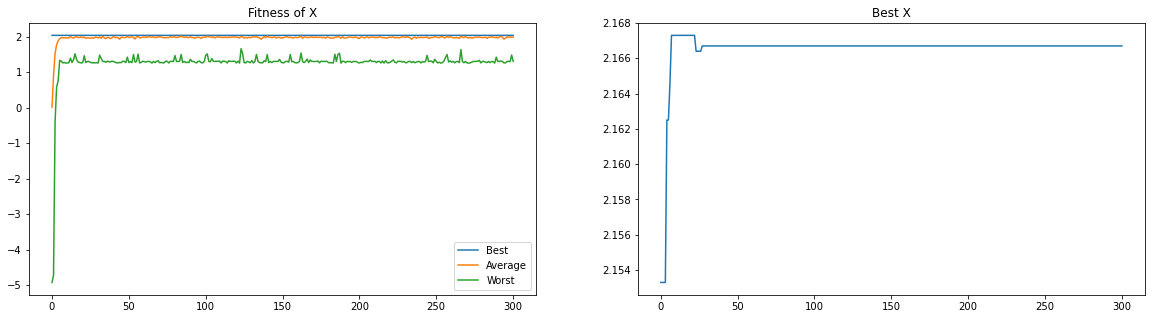

No handles with labels found to put in legend.


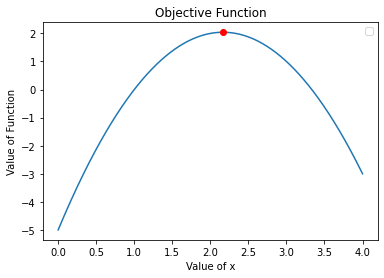

In [83]:
best_OF_value, best_solution, best, avg, worst, bestx, population = genetic_algorithm(num_generations = 300, population_size=100, prop = 0.01)
print("The largest value of the objective function is: ",  best_OF_value)
print("The corresponding solution is x = ",  bestx[-1])

plt.figure(figsize=(20,5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.title.set_text('Fitness of X')
ax2.title.set_text('Best X')

ax1.plot(best)
ax1.plot(avg)
ax1.plot(worst)
ax1.legend(["Best", "Average", "Worst"])

ax2.plot(bestx)
plt.show()

z = f(best_solution)
x = np.arange(0, 4, 0.0001)
y = f(x)
ax = plt.subplot(111)
ax.plot(x,y)
ax.plot(bestx[-1],best_OF_value,'ro')
ax.set_xlabel('Value of x')
ax.set_ylabel('Value of Function')
ax.set_title('Objective Function')
ax.legend()
plt.show() 

No handles with labels found to put in legend.


[2.2822, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.1667, 2.2663, 2.1837, 2.1467, 2.1667, 2.1607, 2.0737, 2.1164, 2.1567, 2.1667, 2.1666, 2.1867, 2.2562, 2.1065, 2.3286, 2.2602, 2.1827, 2.1667, 2.1108, 2.0661, 2.1651, 2.0667, 2.156, 2.1667, 2.1767, 2.1652, 2.3568, 2.3433, 2.8647, 2.1657, 2.7647, 2.7662, 2.1827, 2.1664, 2.1187, 2.3657, 2.7664, 2.1667, 2.8367, 2.1687, 2.3067, 2.8648, 2.117, 2.266, 2.1027, 2.3647, 2.187, 2.7161, 2.2167, 2.2656, 2.1613]


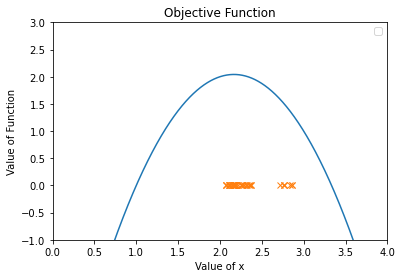

In [84]:
display(population)

#Question 1

In [622]:

def f(x):
    return (x*np.sin(10*x*np.pi)+1) # function to be MAXIMIZED

def initialize_population1(population_size):
    population = []
    for j in range(population_size):
        x = np.random.uniform(low =-0.5, high =1) #Value that will determine the sign of the candidate solution
        x = np.around(x,4)
        population.append(x)
    return population

def evaluate_fitness1(population):
    population_size = len(population)
    fitness = []
    bestx, fitx = -1, 0
    for j in range(population_size):
        if float(population[j])<-0.5 or float(population[j])>1: #Solutions that violate the constraints will be penalized with low fitness value
            fit = f(0.25)         
        else:
            fit = f(population[j])
        fitness.append(fit)
        if bestx:
            if fit > fitx:
                fitx = fit
                bestx = population[j]
        else:
            fitx = fit
            bestx = population[j]
    return fitness, bestx


def selection1(population, fitness, num_parents):
    parents =[]
    for i in range(num_parents):
        if fitness[i] > fitness[num_parents*2-i-1]:
            parents.append(population[i])
        else:
            parents.append(population[num_parents*2-i-1])
    return parents

def mutation1(children):
    num_offspring = len(children)
    for i in range(num_offspring):
        probability = np.random.uniform(low=0, high=1)
        if probability < 0.1:
            random_value = np.random.random_sample()
            children[i] = np.around((children[i] + 0.01 * random_value),4)
    return children   


The largest value of the objective function is:  1.8358667444951955
The corresponding solution is x =  0.8571


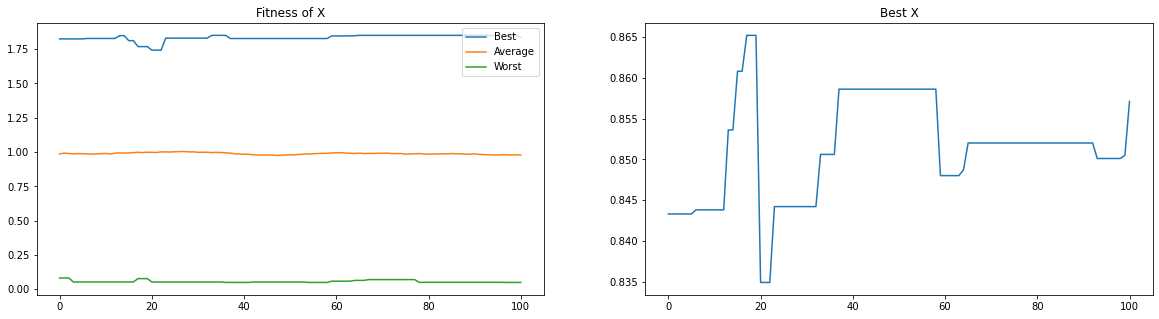

No handles with labels found to put in legend.


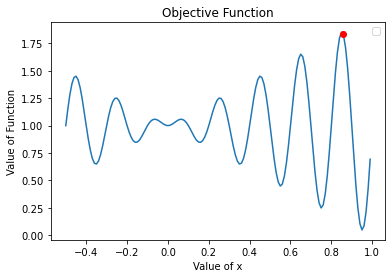

In [623]:
def genetic_algorithm1(num_generations, population_size):
    population = initialize_population1(population_size)
    best, avg, worst, bestx = [], [], [], []
    
    for gen in range(num_generations):
        fitness, bx = evaluate_fitness1(population)
        #print(len(fitness))
        best.append(np.max(fitness))
        avg.append(np.mean(fitness))
        worst.append(np.min(fitness))
        bestx.append(bx) 

        population = mutation1(population)
        
    fitness, bx = evaluate_fitness1(population)
    best.append(np.max(fitness))
    avg.append(np.mean(fitness))
    worst.append(np.min(fitness))
    bestx.append(bx)
    
    best_solution_index = np.argmax(fitness)
    best_OF_value = max(fitness)
    
    ind = population[best_solution_index]
    if ind>=0:
        sign = 1
    else:
        sign = -1
    best_solution = sign*ind
    
    return best_OF_value, best_solution, best, avg, worst, bestx
#----------------------------------------------------------------------------
best_OF_value, best_solution, best, avg, worst, bestx = genetic_algorithm1(num_generations = 100, population_size=100)
print("The largest value of the objective function is: ",  best_OF_value)
print("The corresponding solution is x = ",  bestx[-1])

plt.figure(figsize=(20,5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.title.set_text('Fitness of X')
ax2.title.set_text('Best X')

ax1.plot(best)
ax1.plot(avg)
ax1.plot(worst)
ax1.legend(["Best", "Average", "Worst"])

ax2.plot(bestx)
plt.show()

z = f(best_solution)
x = np.arange(-0.5, 1, 0.01)
y = f(np.array(x))
ax = plt.subplot(111)
ax.plot(x,y)
ax.plot(bestx[-1],best_OF_value,'ro')
ax.set_xlabel('Value of x')
ax.set_ylabel('Value of Function')
ax.set_title('Objective Function')
ax.legend()
plt.show() 